In [159]:
#importing libraries(pandas,numpy,matplotlib,re,nlkt,)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [160]:
#importing dataset using panda data frames
reviews = pd.read_json('C:/Users/Hemantha/Desktop/Office_Products_5.JSON', lines = 'TRUE')
print(reviews.shape)
reviews.head()

(53258, 9)


asin helpful  overall  \
0  B00000JBLH  [3, 4]        5   
1  B00000JBLH  [7, 9]        5   
2  B00000JBLH  [3, 3]        2   
3  B00000JBLH  [7, 8]        5   
4  B00000JBLH  [0, 0]        5   

                                          reviewText   reviewTime  \
0  I bought my first HP12C in about 1984 or so, a...   09 3, 2004   
1  WHY THIS BELATED REVIEW? I feel very obliged t...  12 15, 2007   
2  I have an HP 48GX that has been kicking for mo...   01 1, 2011   
3  I've started doing more finance stuff recently...  04 19, 2006   
4  For simple calculations and discounted cash fl...   08 4, 2013   

       reviewerID         reviewerName  \
0  A32T2H8150OJLU                  ARH   
1  A3MAFS04ZABRGO     Let it Be "Alan"   
2  A1F1A0QQP2XVH5               Mark B   
3   A49R5DBXXQDE5         R. D Johnson   
4  A2XRMQA6PJ5ZJ8  Roger J. Buffington   

                                             summary  unixReviewTime  
0            A solid performer, and long time friend      1094169600  
1  Price of GOLD is up, so don't bury the golden ...      1197676800  
2   Good functionality, but not durable like old HPs      1293840000  
3       One of the last of an almost extinct species      1145404800  
4                                     Still the best      1375574400

In [161]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53258 entries, 0 to 53257
Data columns (total 9 columns):
asin              53258 non-null object
helpful           53258 non-null object
overall           53258 non-null int64
reviewText        53258 non-null object
reviewTime        53258 non-null object
reviewerID        53258 non-null object
reviewerName      52799 non-null object
summary           53258 non-null object
unixReviewTime    53258 non-null int64
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


6.0
6.0


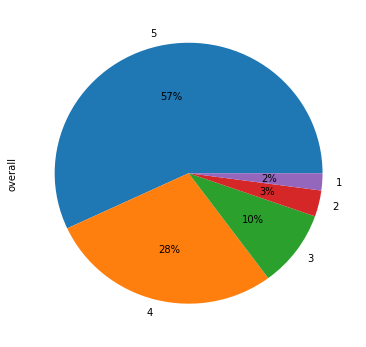

In [162]:
#Explore the dataset for prior knowledge using a pie chart

#change the default plot size to have a better view of the plots
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 6
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

#ploting the pie chart for overall score
reviews.overall.value_counts().plot(kind='pie',autopct='%1.0f%%')

In [163]:
#extracting "overall" and "reviewText" columns
reviews = reviews.drop(['asin','helpful','reviewTime','reviewerID','reviewerName','summary','unixReviewTime'],axis=1)

In [164]:
reviews

overall                                         reviewText
0            5  I bought my first HP12C in about 1984 or so, a...
1            5  WHY THIS BELATED REVIEW? I feel very obliged t...
2            2  I have an HP 48GX that has been kicking for mo...
3            5  I've started doing more finance stuff recently...
4            5  For simple calculations and discounted cash fl...
5            5  While I don't have an MBA, it's hard to believ...
6            5  I've had an HP 12C ever since they were first ...
7            5  Bought this for my boss because he lost his.  ...
8            5  This is a well-designed, simple calculator tha...
9            5  I love this calculator, big numbers and calcul...
10           5  I've had mine for 4 years now and use it almos...
11           5  If you need a calculator that prints, this is ...
12           5  A great, basic calculator that does exactly wh...
13           5  Texas Instruments makes an excellent, relative...
14           4  This review is for the SECOND version of this ...
15           5  This is a well built calculator that has large...
16           5  Texas Instruments Solar Calculater. This is a ...
17           5  I didn't take math my senior year of high scho...
18           4  This is a good calculator, does what it is sup...
19           5  Amazon is totally my school supply go to place...
20           4  This calculator does the job for what I need. ...
21           5  Outside of being able to attach this to your c...
22           5  This TI scientific calculator was easy to use ...
23           5  This is a very nice calculator for high school...
24           5  I got this at the Big Box retailer that I desp...
25           3  Too much error code...does not work for me and...
26           5  When working properly, these are wonderful cal...
27           5  Like others have posted this is not as picture...
28           5  I used this calculator throughout college and ...
29           5  Unless your instructor requires you for having...
...        ...                                                ...
53228        4  After living through 3 fires, 2 were caused by...
53229        4  I have been using this case to store valuables...
53230        5  I received both the medium and the large safes...
53231        4  I am only giving this 4 stars because it is on...
53232        5  The SentrySafe is a very good small safe for p...
53233        4  This is a sturdy, well-made chest.  It is a bi...
53234        5  My house hasn't burned down (fortunately) so I...
53235        4  This safe is designed for a specific purpose -...
53236        5  This firesafe looks like it will most definite...
53237        4  Security in a box. SentrySafe FHW40220 Large F...
53238        5  My wife has been bugging me to get a new safe ...
53239        5  I needed a safe for important papers so was th...
53240        4  This product worked well for our purposes. I d...
53241        3  I wanted to give this product a higher rating ...
53242        4  This is a very heavy, and hopefully heavy duty...
53243        4  Easy to use and well built.  This thing is bui...
53244        4  The safe has an attractive gray metallic finis...
53245        5  Light weight for the purposes it serves this d...
53246        5  What a nice safe! I have a large combination s...
53247        5  This is a very well made fire proof file cabin...
53248        5  I am reviewing this product for what it is, no...
53249        5  This is a good quality, solidly built firesafe...
53250        5  It works :) I even did video to show measureme...
53251        5  I do quite a bit of mail-outs so I was stoked ...
53252        5  I like theAccuteck ShipPro Shipping Postal Sca...
53253        4  What I like about this scale is you can power ...
53254        5  This Accuteck ShipPro digital scale works very...
53255        5  I ship a lot of stuff.  I sell small parts, ma...
53256        5  This is a great little scale to

In [165]:
#making two classes for review classification
#overall (1-3)-negative reviews(0) / (4-5)-positive reviews(1)
def replaceOverallScore(rating):
    if rating <= 3:
        return 0
    else:
        return 1
    
reviews['overall'] = reviews['overall'].apply(replaceOverallScore)

In [166]:
reviews

overall                                         reviewText
0            1  I bought my first HP12C in about 1984 or so, a...
1            1  WHY THIS BELATED REVIEW? I feel very obliged t...
2            0  I have an HP 48GX that has been kicking for mo...
3            1  I've started doing more finance stuff recently...
4            1  For simple calculations and discounted cash fl...
5            1  While I don't have an MBA, it's hard to believ...
6            1  I've had an HP 12C ever since they were first ...
7            1  Bought this for my boss because he lost his.  ...
8            1  This is a well-designed, simple calculator tha...
9            1  I love this calculator, big numbers and calcul...
10           1  I've had mine for 4 years now and use it almos...
11           1  If you need a calculator that prints, this is ...
12           1  A great, basic calculator that does exactly wh...
13           1  Texas Instruments makes an excellent, relative...
14           1  This review is for the SECOND version of this ...
15           1  This is a well built calculator that has large...
16           1  Texas Instruments Solar Calculater. This is a ...
17           1  I didn't take math my senior year of high scho...
18           1  This is a good calculator, does what it is sup...
19           1  Amazon is totally my school supply go to place...
20           1  This calculator does the job for what I need. ...
21           1  Outside of being able to attach this to your c...
22           1  This TI scientific calculator was easy to use ...
23           1  This is a very nice calculator for high school...
24           1  I got this at the Big Box retailer that I desp...
25           0  Too much error code...does not work for me and...
26           1  When working properly, these are wonderful cal...
27           1  Like others have posted this is not as picture...
28           1  I used this calculator throughout college and ...
29           1  Unless your instructor requires you for having...
...        ...                                                ...
53228        1  After living through 3 fires, 2 were caused by...
53229        1  I have been using this case to store valuables...
53230        1  I received both the medium and the large safes...
53231        1  I am only giving this 4 stars because it is on...
53232        1  The SentrySafe is a very good small safe for p...
53233        1  This is a sturdy, well-made chest.  It is a bi...
53234        1  My house hasn't burned down (fortunately) so I...
53235        1  This safe is designed for a specific purpose -...
53236        1  This firesafe looks like it will most definite...
53237        1  Security in a box. SentrySafe FHW40220 Large F...
53238        1  My wife has been bugging me to get a new safe ...
53239        1  I needed a safe for important papers so was th...
53240        1  This product worked well for our purposes. I d...
53241        0  I wanted to give this product a higher rating ...
53242        1  This is a very heavy, and hopefully heavy duty...
53243        1  Easy to use and well built.  This thing is bui...
53244        1  The safe has an attractive gray metallic finis...
53245        1  Light weight for the purposes it serves this d...
53246        1  What a nice safe! I have a large combination s...
53247        1  This is a very well made fire proof file cabin...
53248        1  I am reviewing this product for what it is, no...
53249        1  This is a good quality, solidly built firesafe...
53250        1  It works :) I even did video to show measureme...
53251        1  I do quite a bit of mail-outs so I was stoked ...
53252        1  I like theAccuteck ShipPro Shipping Postal Sca...
53253        1  What I like about this scale is you can power ...
53254        1  This Accuteck ShipPro digital scale works very...
53255        1  I ship a lot of stuff.  I sell small parts, ma...
53256        1  This is a great little scale to

In [167]:
#seperate review text from panda frmae in order to cleaning process
review_text = reviews.iloc[:,1].values 
overall = reviews.iloc[:,0].values
#review_text
#overall

In [168]:
#data cleaning process
#creating a list  to store cleaned data
processed_features = []

for word in range(0, len(review_text)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(review_text[word]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    
    #Remove urls
    processed_feature = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', processed_feature, flags=re.I)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    
    processed_features.append(processed_feature)

In [169]:
processed_features

['i bought my first hp12c in about 1984 or so and it served me faithfully until 2002 when lost it while travelling searched for another one to replace it but found one difficult to come by in my area so decided to buy up and purchased an hp 49g what mistake know that many people view the hp 49g now 49g as the flagship of the hp line but for me that was disaster the 49g may be powerful but using it is extremely counterintuitive and the manual was sketchy at best the 12c on the other hand does what need in way that makes good sense to me if you are looking for solid reliable calculator the hp12c may be for you it programmable it does basic statistics well and many business applications too the manual makes sense you will be up and running in short order m ready to set my 49g aside and move back to my old friend didn even have to replace the batteries in well over decade of use hp 12c m coming home ',
 'why this belated review feel very obliged to share my views about this old workhorse t

In [170]:
#tokenization of review texts uisng nltk word_tokenize
tokens = [] 

for words in range(0, len(processed_features)):
    
    token = nltk.word_tokenize(processed_features[words])

    tokens.append(token)

In [171]:
tokens

[['i',
  'bought',
  'my',
  'first',
  'hp12c',
  'in',
  'about',
  '1984',
  'or',
  'so',
  'and',
  'it',
  'served',
  'me',
  'faithfully',
  'until',
  '2002',
  'when',
  'lost',
  'it',
  'while',
  'travelling',
  'searched',
  'for',
  'another',
  'one',
  'to',
  'replace',
  'it',
  'but',
  'found',
  'one',
  'difficult',
  'to',
  'come',
  'by',
  'in',
  'my',
  'area',
  'so',
  'decided',
  'to',
  'buy',
  'up',
  'and',
  'purchased',
  'an',
  'hp',
  '49g',
  'what',
  'mistake',
  'know',
  'that',
  'many',
  'people',
  'view',
  'the',
  'hp',
  '49g',
  'now',
  '49g',
  'as',
  'the',
  'flagship',
  'of',
  'the',
  'hp',
  'line',
  'but',
  'for',
  'me',
  'that',
  'was',
  'disaster',
  'the',
  '49g',
  'may',
  'be',
  'powerful',
  'but',
  'using',
  'it',
  'is',
  'extremely',
  'counterintuitive',
  'and',
  'the',
  'manual',
  'was',
  'sketchy',
  'at',
  'best',
  'the',
  '12c',
  'on',
  'the',
  'other',
  'hand',
  'does',
  'what',


In [172]:
#removing stop words from tokenized text
english_stop_words = stopwords.words('english')
def remove_stop_words(reviews):
    removed_stop_words = []
    for review in reviews:
        removed_stop_words.append(
            [word for word in review
                      if word not in english_stop_words])
    return removed_stop_words

no_stop_words = remove_stop_words(tokens)

In [173]:
#output after removing stop words
no_stop_words

[['bought',
  'first',
  'hp12c',
  '1984',
  'served',
  'faithfully',
  '2002',
  'lost',
  'travelling',
  'searched',
  'another',
  'one',
  'replace',
  'found',
  'one',
  'difficult',
  'come',
  'area',
  'decided',
  'buy',
  'purchased',
  'hp',
  '49g',
  'mistake',
  'know',
  'many',
  'people',
  'view',
  'hp',
  '49g',
  '49g',
  'flagship',
  'hp',
  'line',
  'disaster',
  '49g',
  'may',
  'powerful',
  'using',
  'extremely',
  'counterintuitive',
  'manual',
  'sketchy',
  'best',
  '12c',
  'hand',
  'need',
  'way',
  'makes',
  'good',
  'sense',
  'looking',
  'solid',
  'reliable',
  'calculator',
  'hp12c',
  'may',
  'programmable',
  'basic',
  'statistics',
  'well',
  'many',
  'business',
  'applications',
  'manual',
  'makes',
  'sense',
  'running',
  'short',
  'order',
  'ready',
  'set',
  '49g',
  'aside',
  'move',
  'back',
  'old',
  'friend',
  'even',
  'replace',
  'batteries',
  'well',
  'decade',
  'use',
  'hp',
  '12c',
  'coming',
  '

In [174]:
#stemming text uisng poter's stemmer
ps = PorterStemmer()
def stem_words(reviews):
       return [([ps.stem(word) for word in review]) for review in reviews]
 
    
    
stem_words_ = stem_words(no_stop_words)

In [175]:
#output after doing stemming
stem_words_

[['bought',
  'first',
  'hp12c',
  '1984',
  'serv',
  'faith',
  '2002',
  'lost',
  'travel',
  'search',
  'anoth',
  'one',
  'replac',
  'found',
  'one',
  'difficult',
  'come',
  'area',
  'decid',
  'buy',
  'purchas',
  'hp',
  '49g',
  'mistak',
  'know',
  'mani',
  'peopl',
  'view',
  'hp',
  '49g',
  '49g',
  'flagship',
  'hp',
  'line',
  'disast',
  '49g',
  'may',
  'power',
  'use',
  'extrem',
  'counterintuit',
  'manual',
  'sketchi',
  'best',
  '12c',
  'hand',
  'need',
  'way',
  'make',
  'good',
  'sens',
  'look',
  'solid',
  'reliabl',
  'calcul',
  'hp12c',
  'may',
  'programm',
  'basic',
  'statist',
  'well',
  'mani',
  'busi',
  'applic',
  'manual',
  'make',
  'sens',
  'run',
  'short',
  'order',
  'readi',
  'set',
  '49g',
  'asid',
  'move',
  'back',
  'old',
  'friend',
  'even',
  'replac',
  'batteri',
  'well',
  'decad',
  'use',
  'hp',
  '12c',
  'come',
  'home'],
 ['belat',
  'review',
  'feel',
  'oblig',
  'share',
  'view',
  

In [176]:
#Lemmatizing
def get_lemmatized_text(reviews):
    lemmatizer = WordNetLemmatizer()
    return [([lemmatizer.lemmatize(word) for word in review]) for review in reviews]

lemmatized_reviews = get_lemmatized_text(stem_words_)

In [177]:
#output after lemmatizing
lemmatized_reviews

[['bought',
  'first',
  'hp12c',
  '1984',
  'serv',
  'faith',
  '2002',
  'lost',
  'travel',
  'search',
  'anoth',
  'one',
  'replac',
  'found',
  'one',
  'difficult',
  'come',
  'area',
  'decid',
  'buy',
  'purchas',
  'hp',
  '49g',
  'mistak',
  'know',
  'mani',
  'peopl',
  'view',
  'hp',
  '49g',
  '49g',
  'flagship',
  'hp',
  'line',
  'disast',
  '49g',
  'may',
  'power',
  'use',
  'extrem',
  'counterintuit',
  'manual',
  'sketchi',
  'best',
  '12c',
  'hand',
  'need',
  'way',
  'make',
  'good',
  'sen',
  'look',
  'solid',
  'reliabl',
  'calcul',
  'hp12c',
  'may',
  'programm',
  'basic',
  'statist',
  'well',
  'mani',
  'busi',
  'applic',
  'manual',
  'make',
  'sen',
  'run',
  'short',
  'order',
  'readi',
  'set',
  '49g',
  'asid',
  'move',
  'back',
  'old',
  'friend',
  'even',
  'replac',
  'batteri',
  'well',
  'decad',
  'use',
  'hp',
  '12c',
  'come',
  'home'],
 ['belat',
  'review',
  'feel',
  'oblig',
  'share',
  'view',
  'o

In [178]:
#define a function to get the sentence againg to calculate tf_idf values
def join(lem_tokens):
      return [' '.join([word for word in review]) for review in lem_tokens]

In [179]:
join_output = join(lemmatized_reviews)

In [180]:
join_output

['bought first hp12c 1984 serv faith 2002 lost travel search anoth one replac found one difficult come area decid buy purchas hp 49g mistak know mani peopl view hp 49g 49g flagship hp line disast 49g may power use extrem counterintuit manual sketchi best 12c hand need way make good sen look solid reliabl calcul hp12c may programm basic statist well mani busi applic manual make sen run short order readi set 49g asid move back old friend even replac batteri well decad use hp 12c come home',
 'belat review feel oblig share view old workhors hp12c gold 25th anniversari 1oth year satisfi ower user fan especi share frank view amazon two three successor amazon com buri hp12c platinum 2004 1st releas hp12cp prais hp12c platiunum anniversari edit 2006 3rd releas hp12cpae hp12cpa major hp 12c calcul owner fan includ non techki nerd like name hewlett packard major hp 12c calcul owner fan brandnam hewlett packard synonym highest qualiti best rang offer handheld electron busi financi calcul first g

In [202]:
#convert text features into TF-IDF feature vectors

#define the vectorization model to extract the feature set
vectorizer = TfidfVectorizer (max_features=3000, min_df=0.1, max_df=0.8)

#pass the corpus into the defined vectorizer
vectorization_out = vectorizer.fit_transform(join_output).toarray()

In [203]:
#tf_idf matrix 
vectorization_out

array([[0.        , 0.        , 0.19658911, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45131795, 0.        ,
        0.17917096],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.71591065],
       ...,
       [0.        , 0.        , 0.16625416, ..., 0.        , 0.        ,
        0.1735942 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11623693, 0.        ,
        0.        ]])

In [204]:
#define trainig set and testing set
X_train, X_test, y_train, y_test = train_test_split(vectorization_out, overall, test_size=0.2, random_state=0)

In [205]:
#traing the model uisng RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

#predict the output uisng testing set
predictions = text_classifier.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[  12 1547]
 [  15 9078]]
             precision    recall  f1-score   support

          0       0.44      0.01      0.02      1559
          1       0.85      1.00      0.92      9093

avg / total       0.79      0.85      0.79     10652

0.8533608711978972


In [206]:
#trian model uisng support vector machine
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)

predictions_svm = classifier_linear.predict(X_test)

print(confusion_matrix(y_test,predictions_svm))
print(classification_report(y_test,predictions_svm))
print(accuracy_score(y_test, predictions_svm))

[[   0 1559]
 [   0 9093]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1559
          1       0.85      1.00      0.92      9093

avg / total       0.73      0.85      0.79     10652

0.8536425084491175


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [195]:
#train model using KNN
#most accurate for K = 7 (after trying several values)
classifier_knn = KNeighborsClassifier(n_neighbors=7)
classifier_knn.fit(X_train, y_train)

predictions_knn = classifier_knn.predict(X_test)

print(confusion_matrix(y_test,predictions_knn))
print(classification_report(y_test,predictions_knn))
print(accuracy_score(y_test, predictions_knn))

[[  80 1479]
 [ 193 8900]]
             precision    recall  f1-score   support

          0       0.29      0.05      0.09      1559
          1       0.86      0.98      0.91      9093

avg / total       0.77      0.84      0.79     10652

0.8430341719864815


In [196]:
#train the model using naive Bayes

classifier_naive = MultinomialNB()
classifier_naive.fit(X_train, y_train)

predictions_naive = classifier_naive.predict(X_test)

print(confusion_matrix(y_test,predictions_naive))
print(classification_report(y_test,predictions_naive))
print(accuracy_score(y_test, predictions_naive))

[[   0 1559]
 [   0 9093]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1559
          1       0.85      1.00      0.92      9093

avg / total       0.73      0.85      0.79     10652

0.8536425084491175


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
